# application_data.csv

## 1.Import libraries and set required parameters

In [1]:
#import all the libraries and modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from scipy import stats 
import warnings
warnings.filterwarnings('ignore')
import os

pd.set_option("display.max_columns",500)
              
df=pd.read_csv("./application_data.csv")

df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## 2. Data Sourcing

In [2]:
#shape of allpcation_data.csv data

df.shape

(307511, 122)

In [3]:
#take information about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [4]:
#get the information about the numerical data

df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

## 3. Data Cleaning

In [5]:
#Drop some unnecessary columns from the dataset application_data.csv

df=df.drop(['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_EMP_PHONE',
                'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 
               'FLAG_PHONE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 
               'REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION', 
               'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 
               'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','ORGANIZATION_TYPE',
               'LIVE_CITY_NOT_WORK_CITY', 'OBS_30_CNT_SOCIAL_CIRCLE', 
               'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',
               'DEF_60_CNT_SOCIAL_CIRCLE'], axis=1)

df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMAIL,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,0,Laborers,WEDNESDAY,10,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,0,Core staff,MONDAY,11,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,0,Laborers,MONDAY,9,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,0,Laborers,WEDNESDAY,17,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-617.0,0,1,0,0,0,0,0,0,0,0,0

In [6]:
#Null values percentage in application_data.csv dataset

df.isnull().mean().round(4)*100

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
CNT_CHILDREN                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 102, dtype: float64

In [7]:
#Drop all the columns having more than 30% null values

drop_cols=df.columns[df.isnull().mean() > 0.30]
df_1 = df.drop(drop_cols, axis = 1)

df_1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMAIL,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,0,WEDNESDAY,10,0.262949,0.139376,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,0,MONDAY,11,0.622246,NaN,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,0,MONDAY,9,0.555912,0.729567,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,0,WEDNESDAY,17,0.650442,NaN,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,0,THURSDAY,11,0.322738,NaN,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,1,0,THURSDAY,15,0.681632,NaN,-273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,1,0,MONDAY,8,0.115992,NaN,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,1,1,THURSDAY,9,0.535722,0.218859,-1909.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,-11961,-4786,-2562.0,-931,1,0,WEDNESDAY,9,0.514163,0.661024,-322.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
#After dropping the columns 

df_1.shape

(307511, 52)

In [9]:
#Dropped columns

drop_cols

Index(['OWN_CAR_AGE', 'OCCUPATION_TYPE', 'EXT_SOURCE_1', 'APARTMENTS_AVG',
       'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
       'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI',
       'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI',
       'NONLIVINGAPARTMENTS_MEDI', 'NONLI

In [10]:
# After dropping check the null value again

df_1.isnull().mean().round(4)*100

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
AMT_GOODS_PRICE                0.09
NAME_TYPE_SUITE                0.42
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
REGION_POPULATION_RELATIVE     0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                  0.00
DAYS_REGISTRATION              0.00
DAYS_ID_PUBLISH                0.00
FLAG_MOBIL                     0.00
FLAG_EMAIL                     0.00
WEEKDAY_APPR_PROCESS_START     0.00
HOUR_APPR_PROCESS_START        0.00
EXT_SOURCE_2                   0.21
EXT_SOURCE_3                  19.83
DAYS_LAST_PHONE_CHANGE         0.00
FLAG_DOCUMENT_2                0.00
FLAG_DOCUMENT_3             

In [11]:
#cast all continous variable to numeric

df_2 = df_1.select_dtypes(np.number)

df_2.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMAIL,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,1,0,10,0.262949,0.139376,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,1,0,11,0.622246,NaN,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,1,0,9,0.555912,0.729567,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,1,0,17,0.650442,NaN,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,1,0,11,0.322738,NaN,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Derived Metrics

In [12]:
#credit income ratio

df_1['credit_income_ratio']=df_1['AMT_CREDIT']/df_1['AMT_INCOME_TOTAL']
df_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMAIL,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,credit_income_ratio
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,0,WEDNESDAY,10,0.262949,0.139376,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,2.007889
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,0,MONDAY,11,0.622246,NaN,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,4.790750
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,0,MONDAY,9,0.555912,0.729567,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,0,WEDNESDAY,17,0.650442,NaN,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2.316167
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,0,THURSDAY,11,0.322738,NaN,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,4.222222


In [13]:
#create bins for credit anount

bins=[0,500000,1000000,1500000,2000000,2500000,3000000,4000000]
range_period=['0-500000','500000-1000000','1000000-1500000','1500000-2000000','2000000-2500000','2500000-3000000','3000000-4000000']
df_1['credit_amount_range']=pd.cut(df_1['AMT_CREDIT'],bins,labels=range_period)


In [14]:

bins=[0,1000000,2000000,3000000,4000000,5000000,6000000,200000000]
range_period=['0-1000000','1000000-2000000','2000000-3000000','3000000-4000000','4000000-5000000','5000000-6000000','6000000 and above']
df_1['Income_amount_range']=pd.cut(df_1['AMT_INCOME_TOTAL'],bins,labels=range_period)


In [15]:
# Age calculation from the column "DAYS_BIRTH".

df_1['Age'] = ((df_1['DAYS_BIRTH']*-1)/365)
df_1['Age']= df_1['Age'].astype(int)

bins=[0,25,50,75,100]
group_names=['0-25','25-50','50-75','75-100']
df_1['Age_binned'] = pd.cut(df_1['Age'], bins, labels=group_names)

In [16]:
df_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMAIL,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,credit_income_ratio,credit_amount_range,Income_amount_range,Age,Age_binned
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,0,WEDNESDAY,10,0.262949,0.139376,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,2.007889,0-500000,0-1000000,25,0-25
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,0,MONDAY,11,0.622246,NaN,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,4.790750,1000000-1500000,0-1000000,45,25-50
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,0,MONDAY,9,0.555912,0.729567,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000,0-500000,0-1000000,52,50-75
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,0,WEDNESDAY,17,0.650442,NaN,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2.316167,0-500000,0-1000000,52,50-75
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,0,THURSDAY,11,0.322738,NaN,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,4.222222,500000-1000000,0-1000000,54,50-75


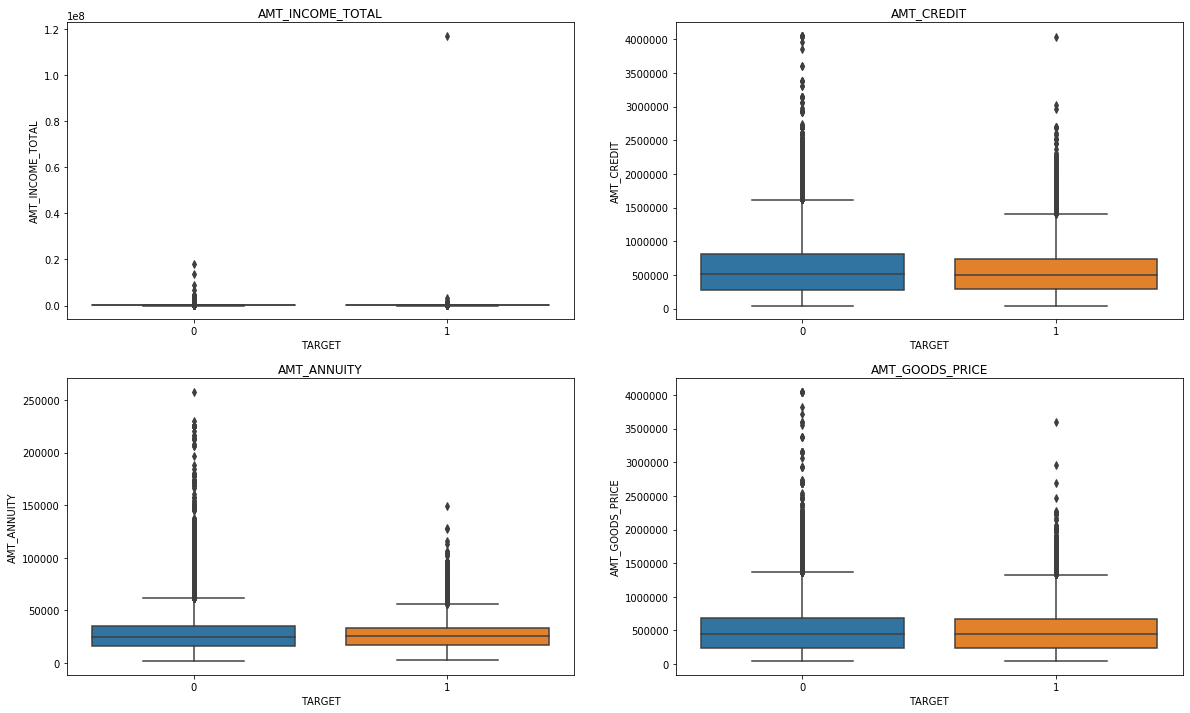

In [17]:
#Plot Box Plot of AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY and AMT_GOODS_PRICE columns

fig, axes = plt.subplots(nrows=2, ncols = 2, figsize=(20,12))

sns.boxplot(x="TARGET", y="AMT_INCOME_TOTAL", data= df_1, ax=axes[0][0])
axes[0][0].set_title('AMT_INCOME_TOTAL')

sns.boxplot(x="TARGET", y="AMT_CREDIT", data= df_1, ax=axes[0][1])
axes[0][1].set_title('AMT_CREDIT')

sns.boxplot(x="TARGET", y="AMT_ANNUITY", data= df_1, ax=axes[1][0])
axes[1][0].set_title('AMT_ANNUITY')

sns.boxplot(x="TARGET", y="AMT_GOODS_PRICE", data= df_1, ax=axes[1][1])
axes[1][1].set_title('AMT_GOODS_PRICE')

plt.show()


We can easily see in the box plot that there are so many outliers which has to removed for the better calculation. So, In the next part of the code we remove outliers from the function "remove_outliers" which accept dataframe and columns name (In which we want to remove outliers) as argument and return the outliers removed dataframe.

In [18]:
#Function for removing outliers

def remove_outlier(df_2, col_name):
    q1 = df_2[col_name].quantile(0.25)
    q3 = df_2[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    l  = q1-1.5*iqr
    h = q3+1.5*iqr
    df_3 = df_2.loc[(df_2[col_name] > l) & (df_2[col_name] < h)]
    return df_3

In [19]:
#Function calling of function "remove_outliers"

cols=['AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']

for i in cols:
    df_1=remove_outlier(df_1,i)
    
df_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMAIL,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,credit_income_ratio,credit_amount_range,Income_amount_range,Age,Age_binned
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,0,WEDNESDAY,10,0.262949,0.139376,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,2.007889,0-500000,0-1000000,25,0-25
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,0,MONDAY,11,0.622246,NaN,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,4.790750,1000000-1500000,0-1000000,45,25-50
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,0,MONDAY,9,0.555912,0.729567,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000,0-500000,0-1000000,52,50-75
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,0,WEDNESDAY,17,0.650442,NaN,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2.316167,0-500000,0-1000000,52,50-75
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,0,THURSDAY,11,0.322738,NaN,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,4.222222,500000-1000000,0-1000000,54,50-75


From now on we will work with this dataframe(df_1).

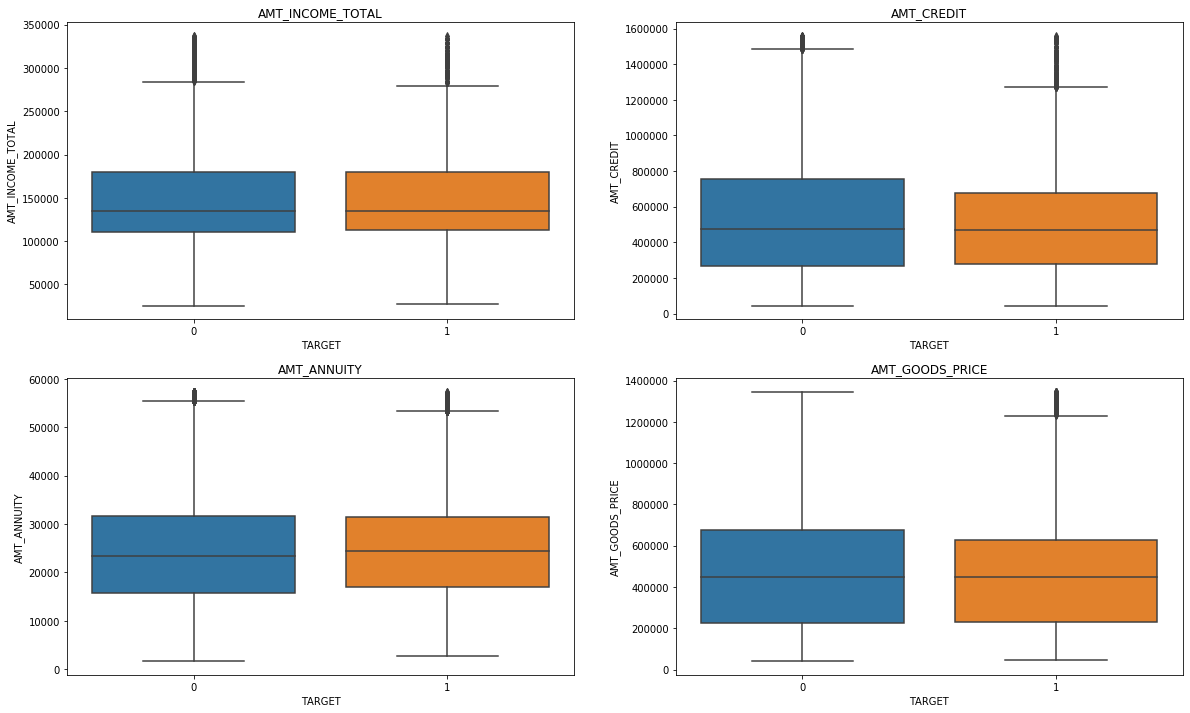

In [20]:
#Plot Box plot again after removing outliers.

fig, axes = plt.subplots(nrows=2, ncols = 2, figsize=(20,12))

sns.boxplot(x="TARGET", y="AMT_INCOME_TOTAL", data= df_1, ax=axes[0][0])
axes[0][0].set_title('AMT_INCOME_TOTAL')

sns.boxplot(x="TARGET", y="AMT_CREDIT", data= df_1, ax=axes[0][1])
axes[0][1].set_title('AMT_CREDIT')

sns.boxplot(x="TARGET", y="AMT_ANNUITY", data= df_1, ax=axes[1][0])
axes[1][0].set_title('AMT_ANNUITY')

sns.boxplot(x="TARGET", y="AMT_GOODS_PRICE", data= df_1, ax=axes[1][1])
axes[1][1].set_title('AMT_GOODS_PRICE')


plt.show()


After cleaning and null values handling in the data, our data is ready for data balancing and analysis.

We perform two type of analysis-

1- Univariate Analysis
2- Bivariate Analysis

In [21]:
#Check the total count of target value as 0 and 1.

target_class=pd.value_counts(df_1['TARGET'],sort=True)
target_class


0    253082
1     23129
Name: TARGET, dtype: int64

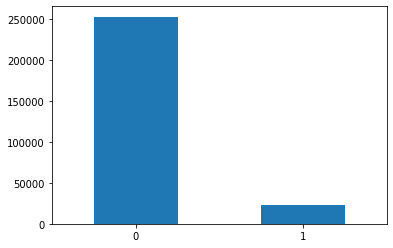

In [22]:
target_class.plot(kind='bar',rot=0)

We can easily see that this data is very much imbalance. Rows with target value 0 is only 91.62% and with 1 is only 8.38%.

For data-balancing we make two dataframes.

1- pa_df-> Having target value 1(Payment difficulties)
2- o_df -> Having target value 0(Other difficulties)

In [23]:
(target_class[0]/df_1.shape[0])*100

91.6263291469203

In [24]:
(target_class[1]/df_1.shape[0])*100

8.37367085307971

We have 242534 rows which has TARGET value as 0 and 22306 rows which has TARGET value as 1.

So, for data balancing we use below part of the code.

pa_df dataframe having TARGET value as 1.

In [25]:
#Data balancing and then print the both balance data.

pa_df=df_1.loc[df_1['TARGET']==1]
o_df=df_1.loc[df_1['TARGET']==0].sample(n=22306,random_state=42)
pa_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMAIL,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,credit_income_ratio,credit_amount_range,Income_amount_range,Age,Age_binned
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,0,WEDNESDAY,10,0.262949,0.139376,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,2.007889,0-500000,0-1000000,25,0-25
26,100031,1,Cash loans,F,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,-18724,-2628,-6573.0,-1827,1,0,MONDAY,9,0.548477,0.190706,-161.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0,8.711040,500000-1000000,0-1000000,51,50-75
40,100047,1,Cash loans,M,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-17482,-1262,-1182.0,-1029,1,0,TUESDAY,9,0.306841,0.320163,-1075.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0,5.894222,1000000-1500000,0-1000000,47,25-50
42,100049,1,Cash loans,F,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,-13384,-3597,-45.0,-4409,1,0,THURSDAY,11,0.674203,0.399676,-1480.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,2.139800,0-500000,0-1000000,36,25-50
81,100096,1,Cash loans,F,0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,-24794,365243,-5391.0,-4199,1,0,THURSDAY,10,0.023952,0.720944,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3.111111,0-500000,0-1000000,67,50-75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307448,456186,1,Cash loans,M,1,207000.0,450000.0,32746.5,450000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.020246,-9918,-3048,-8507.0,-2580,1,0,MONDAY,16,0.329708,0.360613,-324.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,2.173913,0-500000,0-1000000,27,25-50
307475,456215,1,Cash loans,F,1,144000.0,1303200.0,46809.0,1125000.0,Unaccompanied,Working,Higher education,Civil marriage,House / apartment,0.007330,-13416,-2405,-500.0,-4704,1,0,THURSDAY,13,0.583214,0.424130,-1492.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,6.0,9.050000,1000000-1500000,0-1000000,36,25-50
307481,456225,1,Cash loans,M,0,225000.0,297000.0,19975.5,297000.0,Family,Working,Secondary / secondary special,Married,House / apartment,0.008575,-20644,-3147,-8921.0,-3832,1,0,FRIDAY,15,0.713524,0.511892,-2941.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,1.320000,0-500000,0-1000000,56,50-75
307489,456233,1,Cash loans,F,0,225000.0,521280.0,23089.5,450000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.014464,-16471,-286,-8291.0,-9,1,0,

Dataframe having TARGET value as 0.

In [26]:
o_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMAIL,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,credit_income_ratio,credit_amount_range,Income_amount_range,Age,Age_binned
142844,265626,0,Cash loans,F,2,270000.0,651600.0,28831.5,562500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.014464,-14563,-2039,-77.0,-4941,1,0,THURSDAY,3,0.543561,0.537070,-494.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0,2.413333,500000-1000000,0-1000000,39,25-50
258105,398684,0,Cash loans,F,0,189000.0,238500.0,28305.0,238500.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,With parents,0.010006,-9443,-1414,-9422.0,-2107,1,0,WEDNESDAY,11,0.351030,NaN,-259.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,1.261905,0-500000,0-1000000,25,0-25
271724,415007,0,Cash loans,M,0,211500.0,1024740.0,43416.0,900000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.018850,-19074,-12341,-3696.0,-2451,1,1,WEDNESDAY,11,0.668752,0.753067,-1910.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,4.845106,1000000-1500000,0-1000000,52,50-75
123104,242751,0,Cash loans,F,0,157500.0,675000.0,21775.5,675000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.030755,-13421,-395,-236.0,-4800,1,0,WEDNESDAY,14,0.665557,0.440058,-1765.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,7.0,0.0,5.0,4.285714,500000-1000000,0-1000000,36,25-50
146656,270041,0,Cash loans,F,0,135000.0,502497.0,30051.0,454500.0,Family,Commercial associate,Secondary / secondary special,Married,House / apartment,0.007330,-17890,-4776,-4727.0,-1426,1,0,WEDNESDAY,13,0.591857,0.506484,-1226.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0,3.722200,500000-1000000,0-1000000,49,25-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100744,216968,0,Cash loans,F,0,85500.0,417024.0,18499.5,360000.0,Unaccompanied,Pensioner,Incomplete higher,Single / not married,House / apartment,0.010500,-23523,365243,-7489.0,-4372,1,0,TUESDAY,13,0.405661,0.687933,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,4.877474,0-500000,0-1000000,64,50-75
302994,451041,0,Cash loans,M,0,157500.0,521280.0,26743.5,450000.0,Family,Working,Secondary / secondary special,Married,House / apartment,0.024610,-16976,-1722,-8527.0,-502,1,0,TUESDAY,9,0.557585,0.258084,-817.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,3.309714,500000-1000000,0-1000000,46,25-50
111738,229628,0,Cash loans,F,0,90000.0,305955.0,24660.0,283500.0,Family,Working,Secondary / secondary special,Civil marriage,House / apartment,0.020713,-17173,-891,-5208.0,-714,1,0,WEDNESDAY,11,0.422376,0.384207,-1118.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,3.399500,0-500000,0-1000000,47,25-50
201707,333819,0,Cash loans,M,2,180000.0,450000.0,50904.0,450000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.

In [27]:
#Concat both the dataframes(pa_df and o_df)

normalize_df=pd.concat([pa_df,o_df])


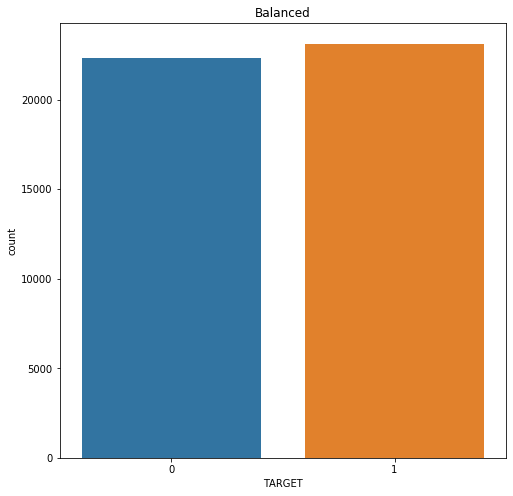

In [28]:
plt.figure(figsize=(8,8))
sns.countplot('TARGET',data=normalize_df)
plt.title('Balanced')
plt.show()


In the above bar plot, we can easily see that now data is balance both value 0 and 1 has equal number of rows in the dataframe.

### Univariate Analysis:-

### Continuious variable

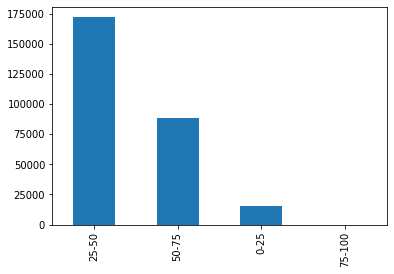

In [31]:
#Plot the bar graph of total people of different ages.

df_1['Age_binned'].value_counts().plot(kind='bar')

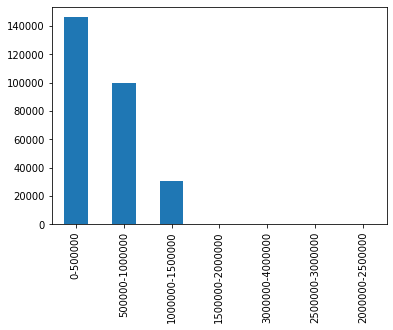

In [32]:

df_1['credit_amount_range'].value_counts().plot(kind='bar')

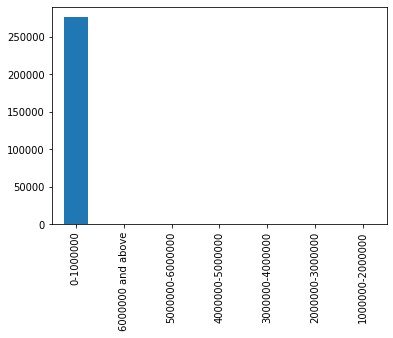

In [34]:
df_1['Income_amount_range'].value_counts().plot(kind='bar')

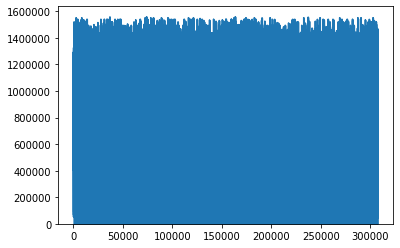

In [35]:
df_1['AMT_CREDIT'].plot.area()

### Categorical Variable

In [36]:
#Calculate the total frquency of each INCOME_TYPE which having TARGET value as 1

freq_table=pa_df.groupby(['NAME_INCOME_TYPE']).size().reset_index(name='count').rename(columns={'NAME_INCOME_TYPE':'INCOME_TYPE'})
freq_table

,INCOME_TYPE,count
0,Commercial associate,4751
1,Maternity leave,1
2,Pensioner,2829
3,State servant,1144
4,Unemployed,8
5,Working,14396


Text(0.5, 1.0, "['INCOME_TYPE,TARGET=1']")

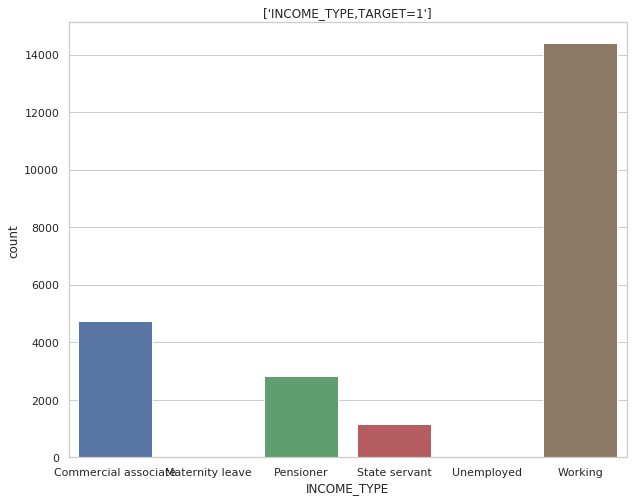

In [37]:
#Plot the graph of the count of the INCOME_TYPE which having TARGET value as 1

plt.figure(figsize=(10,8))
sns.set(style="whitegrid")
ax=sns.barplot(x='INCOME_TYPE',y='count',data=freq_table)
plt.title(['INCOME_TYPE,TARGET=1'])


In [38]:
#Calculate the total frquency of each INCOME_TYPE which having TARGET value as 0

freq_table1=o_df.groupby(['NAME_INCOME_TYPE']).size().reset_index(name='count').rename(columns={'NAME_INCOME_TYPE':'INCOME_TYPE'})
freq_table1

,INCOME_TYPE,count
0,Businessman,1
1,Commercial associate,4877
2,Pensioner,4298
3,State servant,1538
4,Working,11592


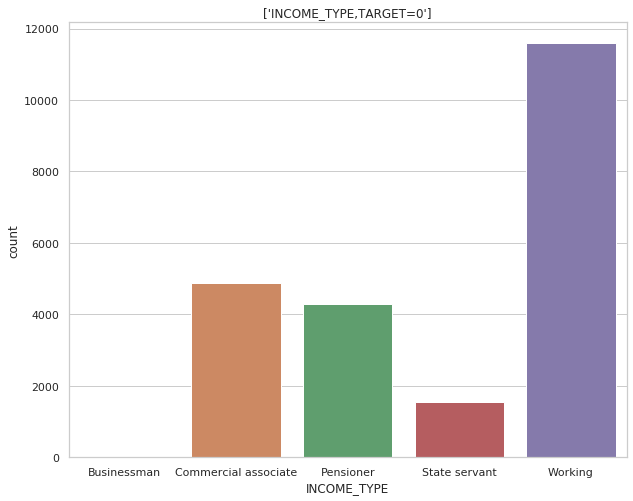

In [39]:
#Plot the graph of the count of the INCOME_TYPE which having TARGET value as 0

plt.figure(figsize=(10,8))
sns.set(style="whitegrid")
ax=sns.barplot(x='INCOME_TYPE',y='count',data=freq_table1)
plt.title(['INCOME_TYPE,TARGET=0'])
plt.show()

In [40]:
#Calculate the total frquency of each FAMILY_STATUS which having TARGET value as 1

freq_table2=pa_df.groupby(['NAME_FAMILY_STATUS']).size().reset_index(name='count').rename(columns={'NAME_FAMILY_STATUS':'FAMILY_STATUS'})
freq_table2

,FAMILY_STATUS,count
0,Civil marriage,2800
1,Married,13704
2,Separated,1502
3,Single / not married,4225
4,Widow,898


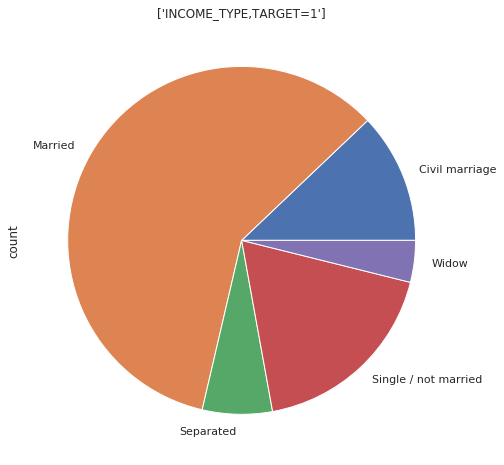

In [41]:
#Plot the pai-graph of the count of the INCOME_TYPE which having TARGET value as 1

plt.figure(figsize=(8,8))
freq_table2['count'].groupby(freq_table2.FAMILY_STATUS).sum().plot(kind="pie")
plt.title(['INCOME_TYPE,TARGET=1'])
plt.show()

In [42]:
#Calculate the total frquency of each FAMILY_STATUS which having TARGET value as 0

freq_table3=o_df.groupby(['NAME_FAMILY_STATUS']).size().reset_index(name='count').rename(columns={'NAME_FAMILY_STATUS':'FAMILY_STATUS'})
freq_table3

,FAMILY_STATUS,count
0,Civil marriage,2207
1,Married,14067
2,Separated,1484
3,Single / not married,3293
4,Widow,1255


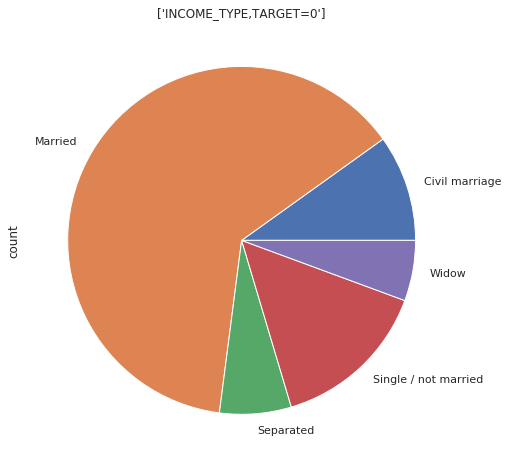

In [43]:
#Plot the pai-graph of the count of the INCOME_TYPE which having TARGET value as 0

plt.figure(figsize=(8,8))
freq_table3['count'].groupby(freq_table3.FAMILY_STATUS).sum().plot(kind="pie")
plt.title(['INCOME_TYPE,TARGET=0'])
plt.show()

### Bivariate Analysis:-

Perform correlation between numerical columns for finding correlation which having TARGET value as 1

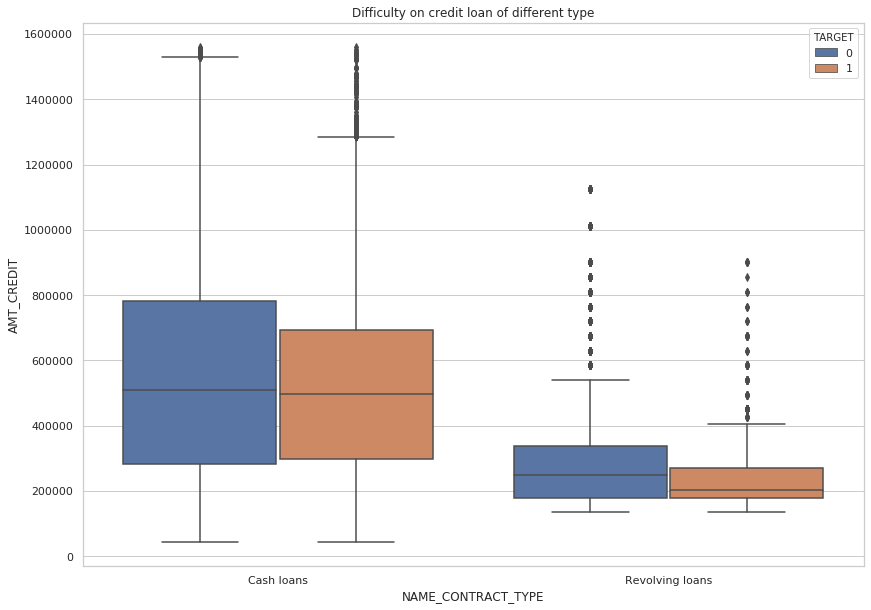

In [44]:
plt.figure(figsize=(14,10))

sns.boxplot(data=df_1,x='NAME_CONTRACT_TYPE',y='AMT_CREDIT',hue='TARGET')
plt.title('Difficulty on credit loan of different type')
plt.show()

In [45]:
#Perform correlation between CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_GOODS_PRICE and REGION_POPULATION_RELATIVE
#Then make correlation matrix

columns=['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE']
corr=pa_df[columns].corr()
corr.style.background_gradient(cmap='coolwarm')

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE
CNT_CHILDREN,1.000000,-0.005366,0.005275,-0.001925,-0.030839
AMT_INCOME_TOTAL,-0.005366,1.000000,0.300632,0.300955,0.081046
AMT_CREDIT,0.005275,0.300632,1.000000,0.978329,0.051605
AMT_GOODS_PRICE,-0.001925,0.300955,0.978329,1.000000,0.060408
REGION_POPULATION_RELATIVE,-0.030839,0.081046,0.051605,0.060408,1.000000


In the correlation matrix, we can identify-

Columns with High Correlation:

1.AMT_GOODS_PRICE and AMT_CREDIT

Columns with Medium Correlation:

1.REGION_POPULATION_RELATIVE and AMT_INCOME_TOTAL                                                                           
2.REGION_POPULATION_RELATIVE and AMT_GOODS_PRICE                                                         
3.REGION_POPULATION_RELATIVE and AMT_CREDIT

Columns with low correlation:

1.AMT_INCOME_TOTAL and CNT_CHILDREN

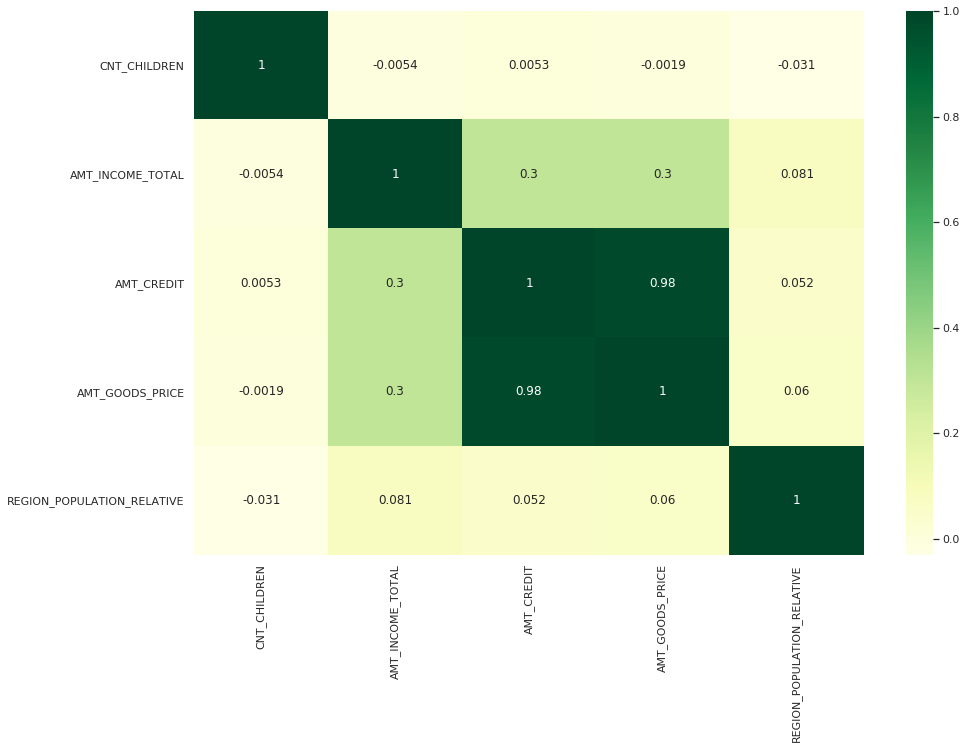

In [46]:
#For better presentaion and understanding we plot heat map between numerical columns.

plt.figure(figsize=(15,10))
sns.heatmap(pa_df[columns].corr(), annot=True,cmap="YlGn")

Perform correlation between numerical columns for finding correlation which having TARGET value as 0

In [47]:
#Perform correlation between CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_GOODS_PRICE and REGION_POPULATION_RELATIVE
#Then make correlation matrix

corr=o_df[columns].corr()
corr.style.background_gradient(cmap='coolwarm')

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE
CNT_CHILDREN,1.000000,0.030331,0.016228,0.012064,-0.038694
AMT_INCOME_TOTAL,0.030331,1.000000,0.324708,0.326107,0.122134
AMT_CREDIT,0.016228,0.324708,1.000000,0.981847,0.038930
AMT_GOODS_PRICE,0.012064,0.326107,0.981847,1.000000,0.042584
REGION_POPULATION_RELATIVE,-0.038694,0.122134,0.038930,0.042584,1.000000


In the correlation matrix, we can identify-

Columns with High Correlation:

1.AMT_GOODS_PRICE and AMT_CREDIT

Columns with Medium Correlation:

1.AMT_INCOME_TOTAL and AMT_CREDIT                                                                          
2.AMT_INCOME_TOTAL and AMT_GOODS_PRICE                                                         

Columns with low correlation:

1.AMT_GOODS_PRICE and CNT_CHILDREN

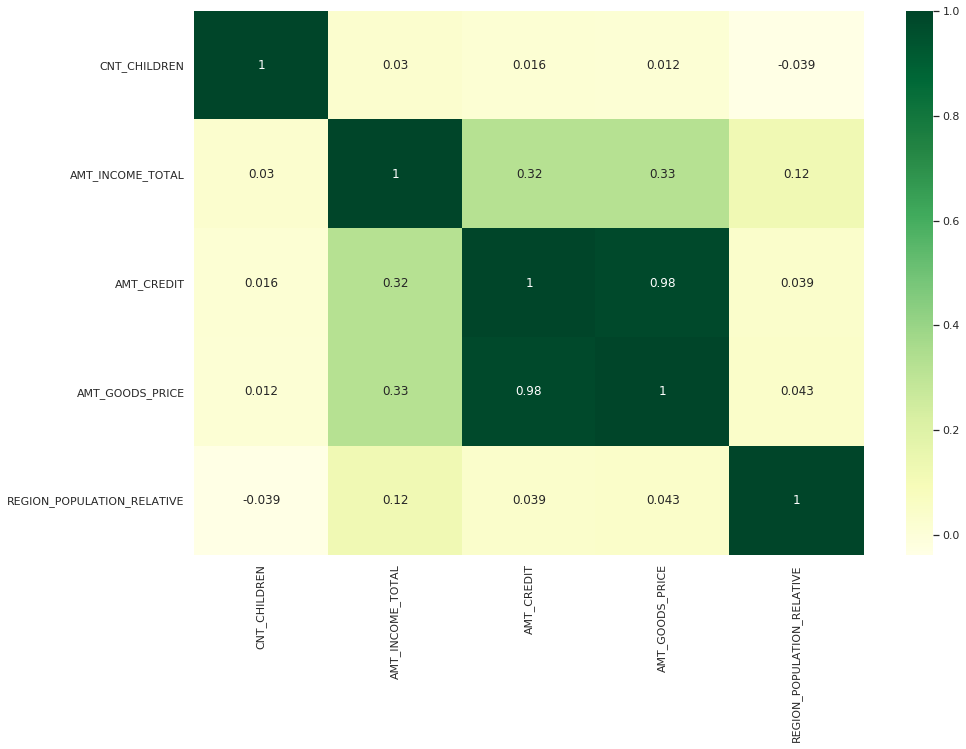

In [48]:
#For better presentaion and understanding we plot heat map between numerical columns.

plt.figure(figsize=(15,10))
sns.heatmap(o_df[columns].corr(), annot=True,cmap="YlGn")

NameError: name 'pa' is not defined

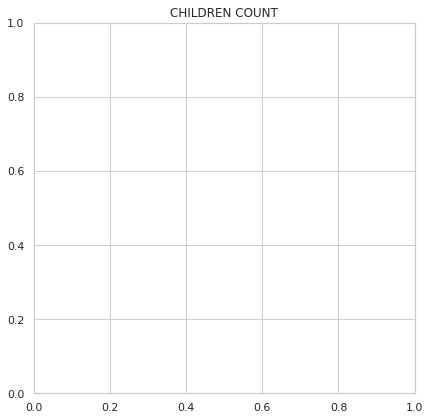

In [50]:
#Box plot on the numerical columns having TARGET value as 1

plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.title('CHILDREN COUNT')
sns.boxplot(pa['CNT_CHILDREN'])


plt.subplot(2,2,2)
plt.title('AMT_INCOME_TOTAL')
sns.boxplot(pa['AMT_INCOME_TOTAL'])


plt.subplot(2,2,3)
plt.title('AMT_CREDIT')
sns.boxplot(pa['AMT_CREDIT'])

plt.subplot(2,2,4)
plt.title('AMT_GOODS_PRICE')
sns.boxplot(pa['AMT_GOODS_PRICE'])


plt.show()

NameError: name 'o' is not defined

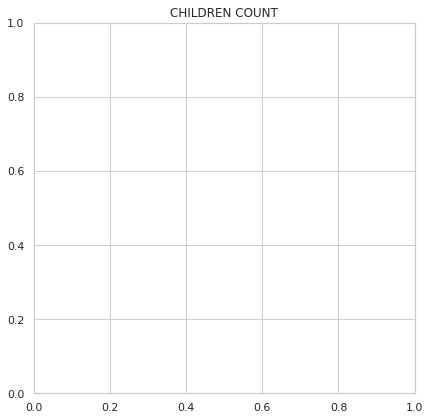

In [51]:
#Box plot on the numerical columns having TARGET value as 0

plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.title('CHILDREN COUNT')
sns.boxplot(o['CNT_CHILDREN'])


plt.subplot(2,2,2)
plt.title('AMT_INCOME_TOTAL')
sns.boxplot(o['AMT_INCOME_TOTAL'])


plt.subplot(2,2,3)
plt.title('AMT_CREDIT')
sns.boxplot(o['AMT_CREDIT'])

plt.subplot(2,2,4)
plt.title('AMT_GOODS_PRICE')
sns.boxplot(o['AMT_GOODS_PRICE'])



plt.show()

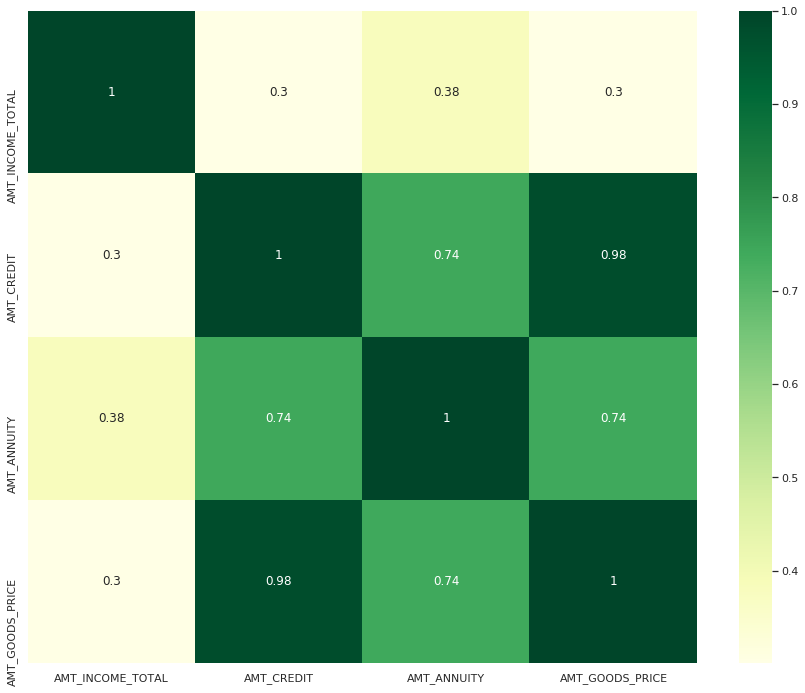

In [52]:
#Heat map on numerical column for TARGET as 1

plt.figure(figsize=(15,12))
col1=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']
sns.heatmap(pa_df[col1].corr(), annot=True,cmap="YlGn")

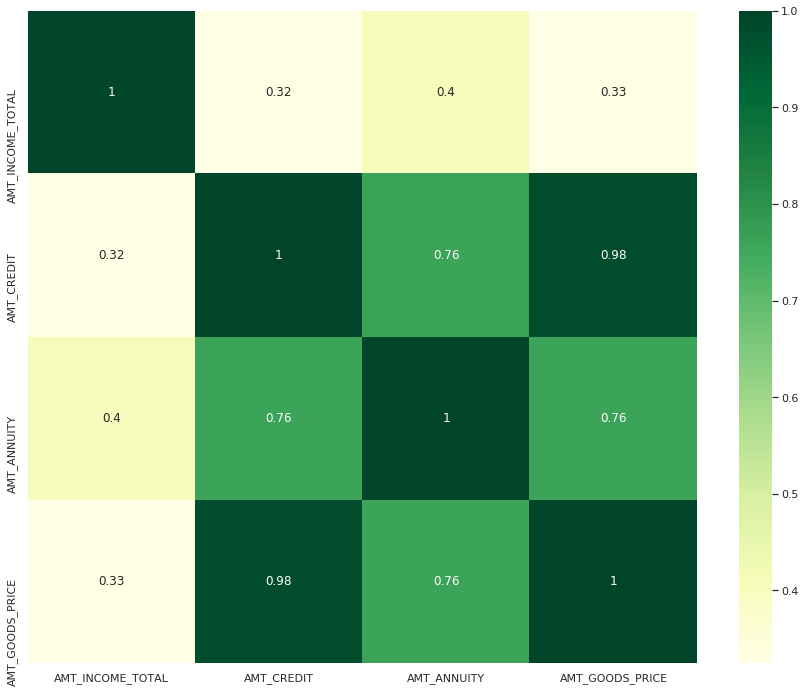

In [53]:
#Heat map on numerical column for TARGET as 0

plt.figure(figsize=(15,12))
col1=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']
sns.heatmap(o_df[col1].corr(), annot=True,cmap="YlGn")

# PREVIOUS DATA


Read the dataset file previous_application.csv which consist previous loan of the customer.

In [54]:
prev_df=pd.read_csv("./previous_application.csv")

prev_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
prev_df.shape

(1670214, 37)

In [56]:
n=int(input("enter the customer id= "))

find_df= prev_df[prev_df['SK_ID_CURR']==n]
find_df=pd.DataFrame(find_df,columns=['SK_ID_CURR','SK_ID_PREV','NAME_CONTRACT_TYPE','CHANNEL_TYPE','NAME_CONTRACT_STATUS'])

find_df

enter the customer id= 5


,SK_ID_CURR,SK_ID_PREV,NAME_CONTRACT_TYPE,CHANNEL_TYPE,NAME_CONTRACT_STATUS


In [58]:
freq_table4=prev_df.groupby(['NAME_CONTRACT_TYPE']).size().reset_index(name='count').rename(columns={'NAME_CONTRACT_TYPE':'CONTRACT_TYPE'})
freq_table4

,CONTRACT_TYPE,count
0,Cash loans,747553
1,Consumer loans,729151
2,Revolving loans,193164
3,XNA,346


##  Univariate Analysis

Text(0.5, 1.0, "['CONTRACT_TYPE']")

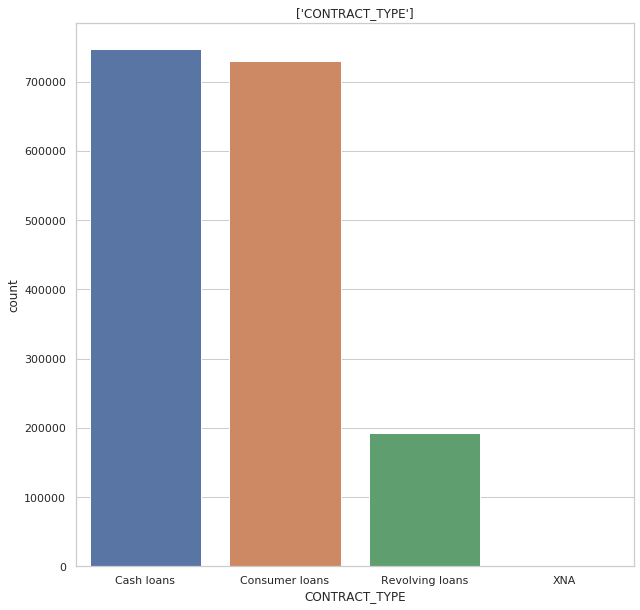

In [59]:
plt.figure(figsize=(10,10))
sns.set(style="whitegrid")
ax=sns.barplot(x='CONTRACT_TYPE',y='count',data=freq_table4)
plt.title(['CONTRACT_TYPE'])

In [60]:
freq_table4=prev_df.groupby(['CHANNEL_TYPE']).size().reset_index(name='count').rename(columns={'CHANNEL_TYPE':'CHANNEL_STATUS'})
freq_table4

,CHANNEL_STATUS,count
0,AP+ (Cash loan),57046
1,Car dealer,452
2,Channel of corporate sales,6150
3,Contact center,71297
4,Country-wide,494690
5,Credit and cash offices,719968
6,Regional / Local,108528
7,Stone,212083


Text(0.5, 1.0, "['CHANNEL_STATUS']")

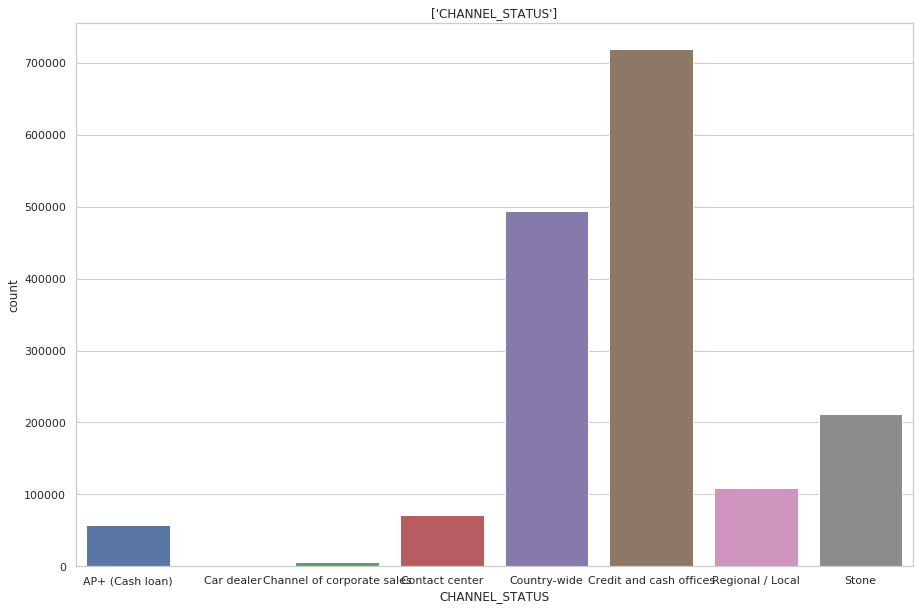

In [61]:
plt.figure(figsize=(15,10))
sns.set(style="whitegrid")
ax=sns.barplot(x='CHANNEL_STATUS',y='count',data=freq_table4)
plt.title(['CHANNEL_STATUS'])

## Bivariate Analysis

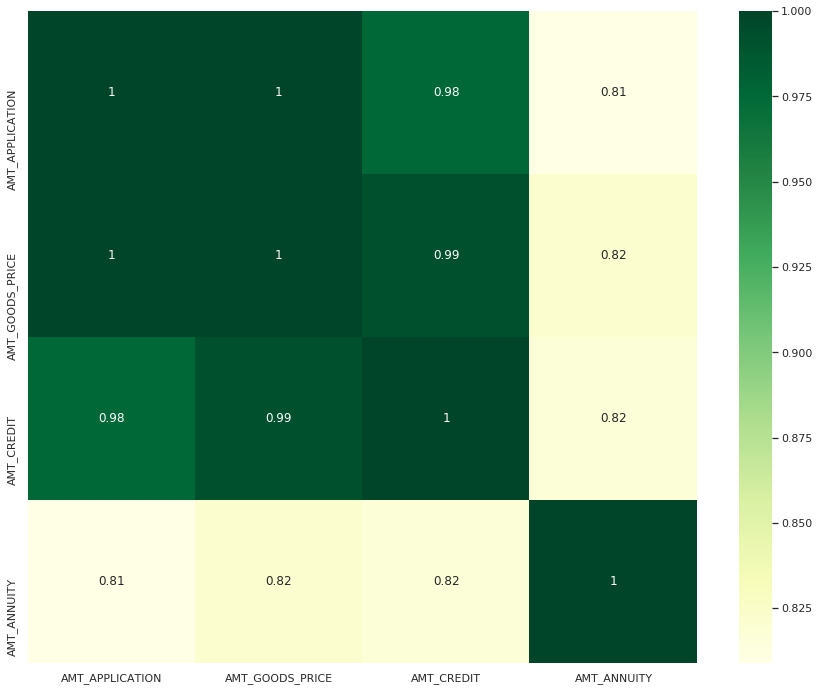

In [62]:
plt.figure(figsize=(15,12))
col1=['AMT_APPLICATION','AMT_GOODS_PRICE','AMT_CREDIT','AMT_ANNUITY']
sns.heatmap(prev_df[col1].corr(), annot=True,cmap="YlGn")

In [63]:
corr_columns=['AMT_APPLICATION','AMT_GOODS_PRICE','AMT_CREDIT','AMT_ANNUITY']

corr=prev_df[corr_columns].corr()
corr.style.background_gradient(cmap='coolwarm')

,AMT_APPLICATION,AMT_GOODS_PRICE,AMT_CREDIT,AMT_ANNUITY
AMT_APPLICATION,1.000000,0.999884,0.975824,0.808872
AMT_GOODS_PRICE,0.999884,1.000000,0.993087,0.820895
AMT_CREDIT,0.975824,0.993087,1.000000,0.816429
AMT_ANNUITY,0.808872,0.820895,0.816429,1.000000


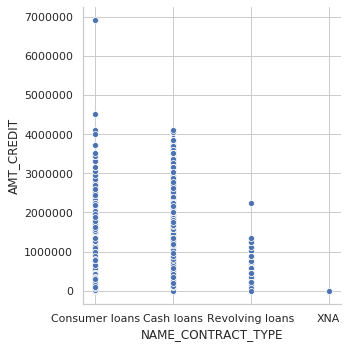

In [64]:
sns.relplot(x="NAME_CONTRACT_TYPE", y="AMT_CREDIT", data=prev_df)

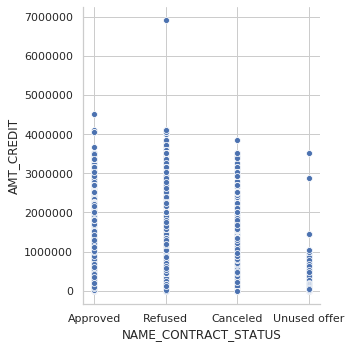

In [65]:
sns.relplot(x='NAME_CONTRACT_STATUS', y="AMT_CREDIT",data=prev_df)

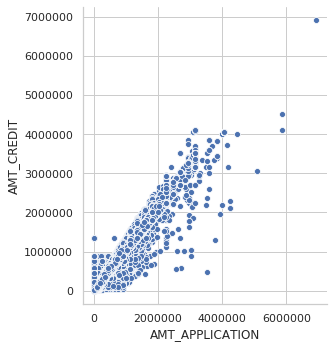

In [66]:
sns.relplot(x='AMT_APPLICATION', y="AMT_CREDIT",data=prev_df)

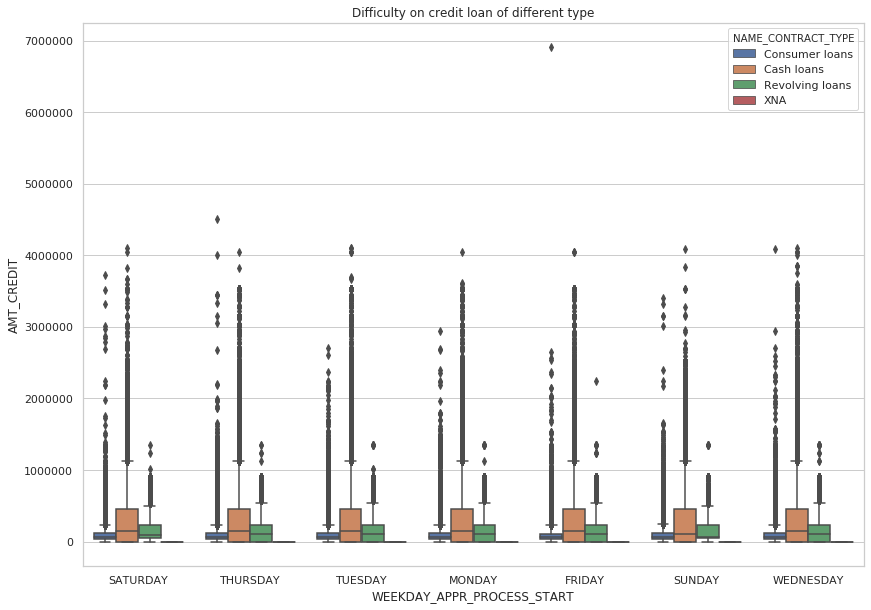

In [67]:
plt.figure(figsize=(14,10))

sns.boxplot(data=prev_df,x='WEEKDAY_APPR_PROCESS_START',y='AMT_CREDIT',hue='NAME_CONTRACT_TYPE')
plt.title('Difficulty on credit loan of different type')
plt.show()

# Conclusion


This case study aims to identify the defaulters and non-defaulters and develop a basic understanding of risk analytics in banking and financial services and understand how data is used to mini-mise the risk of losing money while lending to customers. After our  Analysis on the dataset we accept following key points:

1-Repeater customers are not likely to face any payment issues.                              
2-Customers who has family status as married having high chances of approved the loan.                    
3-Customers with age between 25-30 are likely to be not defaulter.                                 
4-Customer with low income(0-5 lakh) are those who applied for the loan.                                
5-Student and unemployed customers loan application is rejected most of the time and working customers loan will approved easily.                                                                                      
6-Most of the customers are used credit and cash medium in their loan.                                   
7-Thursday and Wednesday are most busiest day for the company so it is recommended that they increase their productivity on these weekdays.                                                                               
8-Most of the customer applied consumer and cash loan which share approx. equal number of approval and disapproval.    
9-Customers who provide half number of required documents are facing issue in their loan approval and customer who provide all the documents are get their approval immediately.      